In [1]:
import xlwings as xw
import math as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [2]:
#загрузка данных
x = xw.Book('Сбер.xlsx')
port = x.sheets['Котировки'] 
data = port.range('B2:N14').options(pd.DataFrame, header = 0, index = False).value
port = x.sheets['Доли']
share = port.range('B2:B14').value
share = np.divide(share,100)
x.close()

print('Доли активов: ', *share)
data

Доли активов:  0.1445 0.1382 0.0443 0.1384 0.042 0.1447 0.06849999999999999 0.1014 0.0288 0.018500000000000003 0.0387 0.0475 0.0137


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,90.385500,209.689000,49.921000,0.036810,24.919474,302.800526,104.010000,62.181053,17.926842,24.397895,38.058421,1414.200000,49.076842
1,91.570500,208.238500,52.518000,0.036105,25.057619,298.960000,103.267143,62.425714,18.362857,22.149524,36.569048,1554.363636,49.745238
2,91.435455,230.880909,56.073636,0.036032,25.322727,293.599545,110.200000,64.530909,19.955909,22.522273,38.050455,1576.272727,47.949545
3,86.709524,230.749048,56.907143,0.035895,25.106190,296.954762,111.010952,63.470000,18.670476,17.666190,35.171905,1656.952381,46.371429
4,88.733684,240.518421,51.779474,0.039721,24.817895,325.950526,109.406316,63.220526,18.251053,14.503158,34.105263,1620.105263,45.800000
5,93.195217,236.998261,50.574348,0.042583,24.684783,344.396957,114.446957,64.677391,18.833043,14.710870,36.235217,1489.130435,47.326522
6,93.779545,220.411364,50.061818,0.039664,24.913636,314.610909,108.412727,60.516364,16.892273,14.166364,33.926818,1311.545455,45.551818
7,95.677143,230.752857,50.844286,0.042143,25.044762,316.851429,116.618095,63.479524,16.901429,13.896190,35.939048,1244.000000,48.602857
8,92.343043,232.320435,50.560870,0.042209,25.242609,313.442174,120.093043,64.347391,16.925652,14.871739,36.628261,1246.869565,50.073478
9,101.738500,237.942000,50.757500,0.045825,25.469500,338.727500,130.164500,67.296500,18.374000,17.601000,38.181500,1285.300000,53.831000


In [3]:
#расчет темпов рост
m,n = 13,12
b = [[0 for j in range(m)] for i in range(n)]
a = data
for i in range(m):
    for j in range(n):
        b[j][i] = a[i][j+1]/a[i][j]
print('Темпы роста:\n',pd.DataFrame(b))

Темпы роста:
            0         1         2         3         4         5         6  \
0   1.013111  0.993083  1.052022  0.980848  1.005544  0.987317  0.992858   
1   0.998525  1.108733  1.067703  0.997973  1.010580  0.982070  1.067135   
2   0.948314  0.999429  1.014864  0.996209  0.991449  1.011428  1.007359   
3   1.023344  1.042338  0.909894  1.106583  0.988517  1.097644  0.985545   
4   1.050280  0.985364  0.976726  1.072041  0.994636  1.056593  1.046073   
5   1.006270  0.930013  0.989866  0.931452  1.009271  0.913512  0.947275   
6   1.020235  1.046919  1.015630  1.062506  1.005263  1.007122  1.075686   
7   0.965153  1.006793  0.994426  1.001562  1.007900  0.989240  1.029798   
8   1.101745  1.024197  1.003889  1.085677  1.008988  1.080670  1.083864   
9   1.051234  1.016438  1.005369  0.998623  1.013163  1.033155  1.049357   
10  1.052235  1.073909  1.099853  1.037653  1.018339  1.084707  0.996866   
11  0.985337  0.964842  1.008342  0.994774  1.000877  0.991629  0.981454  

In [4]:
#расчет логарифмов
l = b
for i in range(n):
    for j in range(m):
        l[i][j] = mt.log(b[i][j])
print('Логарифмы:\n', pd.DataFrame(l),'\n')

Логарифмы:
            0         1         2         3         4         5         6  \
0   0.013025 -0.006941  0.050714 -0.019338  0.005528 -0.012764 -0.007168   
1  -0.001476  0.103218  0.065510 -0.002029  0.010524 -0.018093  0.064978   
2  -0.053070 -0.000571  0.014755 -0.003798 -0.008588  0.011363  0.007332   
3   0.023076  0.041466 -0.094427  0.101277 -0.011549  0.093166 -0.014560   
4   0.049057 -0.014744 -0.023549  0.069565 -0.005378  0.055049  0.045043   
5   0.006250 -0.072557 -0.010186 -0.071011  0.009228 -0.090458 -0.054166   
6   0.020033  0.045852  0.015509  0.060630  0.005249  0.007096  0.072959   
7  -0.035469  0.006770 -0.005590  0.001561  0.007869 -0.010818  0.029362   
8   0.096895  0.023909  0.003881  0.082204  0.008948  0.077581  0.080532   
9   0.049965  0.016305  0.005354 -0.001378  0.013077  0.032617  0.048178   
10  0.050916  0.071305  0.095177  0.036962  0.018173  0.081310 -0.003139   
11 -0.014772 -0.035791  0.008307 -0.005240  0.000877 -0.008407 -0.018720   


In [5]:
#доходность портфеля за год
reven = []
metr = []
for i in range(n):
    s = 0
    for j in range(m):
        s += l[i][j]*share[j]
    reven.append(s) #доходность портфеля по месяцам
avg = np.mean(reven)*n #средняя доходность портфеля за год
disp = np.var(reven)*n #дисперсия портфеля за год
stddev = np.sqrt(disp) #станд отклонение портфеля за год
print('Cредняя доходность портфеля за год: ', avg)
print('Дисперсия портфеля за год: ', disp)
print('Cтандартное отклонение портфеля за год: ', stddev,'\n')

Cредняя доходность портфеля за год:  0.14622948298698987
Дисперсия портфеля за год:  0.010101827635935872
Cтандартное отклонение портфеля за год:  0.10050784862853185 



In [6]:
#центрированная матрица
c = np.array(l)
c = c.transpose()
e = [] 
for i in range(m):
    e.append(np.mean(c[i])) #cреднее логарифмов по компаниям
for i in range(m):
    for j in range(n):
        c[i][j] = c[i][j]-e[i]
c = c.transpose()
print('Центрированная матрица:\n', pd.DataFrame(c),'\n')

Центрированная матрица:
            0         1         2         3         4         5         6  \
0  -0.004011 -0.021793  0.040260 -0.040122  0.001032 -0.030901 -0.028054   
1  -0.018512  0.088366  0.055055 -0.022813  0.006028 -0.036230  0.044092   
2  -0.070106 -0.015423  0.004300 -0.024581 -0.013084 -0.006774 -0.013554   
3   0.006040  0.026614 -0.104882  0.080493 -0.016046  0.075029 -0.035446   
4   0.032021 -0.029596 -0.034004  0.048781 -0.009875  0.036912  0.024157   
5  -0.010786 -0.087409 -0.020641 -0.091795  0.004732 -0.108595 -0.075052   
6   0.002997  0.031000  0.005054  0.039847  0.000753 -0.011041  0.052073   
7  -0.052505 -0.008081 -0.016044 -0.019223  0.003372 -0.028955  0.008476   
8   0.079859  0.009058 -0.006573  0.061420  0.004452  0.059444  0.059646   
9   0.032929  0.001453 -0.005100 -0.022162  0.008581  0.014481  0.027292   
10  0.033880  0.056454  0.084722  0.016178  0.013676  0.063173 -0.024025   
11 -0.031807 -0.050643 -0.002147 -0.026023 -0.003620 -0.026543 

In [7]:
#матрица произведения
d = [0]*n
for i in range(n):
    d[i] = reven[i]-avg/n #разность со средним для портфеля
    for j in range(m):
        c[i][j]=c[i][j]*d[i]
print('Матрица произведения:\n', pd.DataFrame(c),'\n')

d = np.array(d) #центрированная матрица портфеля по месяцам
d2 = d**2 #(Ri - Rср)^2
d3 = d**3 #(Ri - Rср)^3
d4 = d**4 #(Ri - Rср)^4

Матрица произведения:
            0         1         2         3         4         5         6  \
0   0.000046  0.000248 -0.000458  0.000456 -0.000012  0.000351  0.000319   
1  -0.000269  0.001284  0.000800 -0.000331  0.000088 -0.000526  0.000641   
2   0.001910  0.000420 -0.000117  0.000670  0.000356  0.000185  0.000369   
3   0.000070  0.000308 -0.001214  0.000932 -0.000186  0.000869 -0.000410   
4   0.000466 -0.000430 -0.000494  0.000709 -0.000144  0.000537  0.000351   
5   0.000730  0.005916  0.001397  0.006212 -0.000320  0.007349  0.005079   
6   0.000052  0.000542  0.000088  0.000697  0.000013 -0.000193  0.000910   
7   0.000615  0.000095  0.000188  0.000225 -0.000039  0.000339 -0.000099   
8   0.003822  0.000433 -0.000315  0.002939  0.000213  0.002845  0.002854   
9   0.000251  0.000011 -0.000039 -0.000169  0.000065  0.000110  0.000208   
10  0.000936  0.001560  0.002341  0.000447  0.000378  0.001745 -0.000664   
11  0.000739  0.001177  0.000050  0.000605  0.000084  0.000617  0

In [8]:
#загрузка данных рынка
x = xw.Book('ММВБ.xlsx')
port = x.sheets['Котировки'] 
data = port.range('B3:B15').value
x.close()
print('Индекс МосБиржи:\n', pd.DataFrame(data),'\n')

Индекс МосБиржи:
           0
0   2485.27
1   2497.10
2   2559.32
3   2665.33
4   2765.85
5   2739.50
6   2740.04
7   2747.18
8   2893.98
9   2935.37
10  3045.87
11  3076.65
12  2785.08 



In [9]:
#темпы роста и логарифм рынка
for i in range(n):
    data[i] = data[i+1]/data[i]
    data[i] = mt.log(data[i])
data.pop()
print('Логарифмы МосБиржи:\n', pd.DataFrame(data),'\n')

Логарифмы МосБиржи:
            0
0   0.004749
1   0.024612
2   0.040586
3   0.037020
4  -0.009573
5   0.000197
6   0.002602
7   0.052058
8   0.014201
9   0.036953
10  0.010055
11 -0.099565 



In [10]:
#ковариация с рынком, бета-коэффициент
rcov = np.cov(data, reven)[0][1]
beta = rcov/np.var(data)

#безрисковая доходность
r = 0.0713

#коэффициент Шарпа
sharpe = (avg - r)/stddev

#модифицированный коэффициент Шарпа
As = np.sum(d3)/(n*(stddev**3))
Ek = np.sum(d4)/(n*(stddev**4))-3
modSharpe = sharpe*(1+(As/6)*sharpe - (Ek/24)*(sharpe**2))

#коэффициент Трейнора
trey = (avg - r)/beta

#коэффициент Альфа Йенсена
rm = np.mean(data)*n #среднерыночная доходность за год
jensen = avg - (r+(rm - r)*beta)

#индекс Модильяни
modil = ((avg-r)*np.sqrt(np.var(data)*n))/stddev + r

In [11]:
print('\033[1m'+'Показатели портфеля'+'\033[0m')
print('Ожидаемая доходность портфеля: ', avg, '\nДисперсия портфеля:', disp, '\nРиск портфеля (станд.отклонение):', stddev)
print('Ожидаемая доходность рынка: ', rm, '\nСтандартное отклонение доходности рынка: ', np.sqrt(np.var(data)*n),
      '\nБезрисковая доходность rf: ', r, '\nКоэффициент асимметрии As: ', As, '\nКоэффициент эксцесса Ek: ', Ek)
print('\033[1m'+'\nПоказатели эффективности'+'\033[0m')
print('Beta: ', beta, '\nSharpe: ', sharpe, '\nmodSharpe: ', modSharpe, '\nTreynor: ', trey,
      '\nJensen: ', jensen, '\nM2: ', modil)

Показатели портфеля
Ожидаемая доходность портфеля:  0.14622948298698987 
Дисперсия портфеля: 0.010101827635935872 
Риск портфеля (станд.отклонение): 0.10050784862853185
Ожидаемая доходность рынка:  0.11389529272299698 
Стандартное отклонение доходности рынка:  0.13021094318647672 
Безрисковая доходность rf:  0.0713 
Коэффициент асимметрии As:  -0.016551096121426526 
Коэффициент эксцесса Ek:  -2.977227589511689

Показатели эффективности
Beta:  0.15841681816458442 
Sharpe:  0.7455087737866387 
modSharpe:  0.7953751573629132 
Treynor:  0.4729894455343951 
Jensen:  0.06818167224502361 
M2:  0.16837340058855194



Связь между динамикой портфеля и рынка


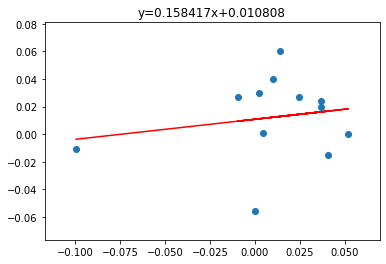

In [12]:
print('\033[1m'+'\nСвязь между динамикой портфеля и рынка'+'\033[0m')
plt.scatter(data, reven)
#линия тренда
z = np.polyfit(np.array(data).flatten(), np.array(reven).flatten(), 1)
p = np.poly1d(z)
plt.plot(data,p(data),"r-")
plt.title("y=%.6fx+%.6f"%(beta,z[1])) 

plt.show()